In [3]:
import os
import csv
import sys

path = 'offtarget'

fileOut=open('offtarget.WXS.csv',"w")
fileOut.write('ID,cov\n')

for f in os.listdir(path):
    file=open("./offtarget/"+f)
    reader=csv.reader(file)
    cov=0.0
    count=0
    for line in reader:
            x=int(line[1])
            y=int(line[2])
            if y>x:
                if line[3]=="":
                    n=0.0
                else:
                    n=float(line[3])
                cov+=n/(y-x)
                count+=1
        
    fileOut.write(f.replace('.offtarget.cov','')+","+str(cov/count))
    fileOut.write("\n")


In [4]:
#gi|23898|emb|X12811.1|  28      2
#gi|23898|emb|X12811.1|  29      2
#MT 16569 bp    DNA



import os
import csv
import sys

path = './MT/cov/'

fileOut=open('MT.WXS.csv',"w")
fileOut.write('ID,cov.MT\n')



for f in os.listdir(path):
    file=open("./MT/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov=0
    
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        cov+=n
        
            
        
    fileOut.write(f.replace('.sort.MT.cov','')+","+str(cov/16569.0))
    fileOut.write("\n")
    
    

In [9]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_MT = pd.read_csv('MT.WXS.csv')

df_MT.head()

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_MT, metadata, on='ID')
data_cov_WXS=pd.merge(df, data, on='ID')


data_cov_WXS['cov_MT_norm'] = data_cov_WXS['cov.MT']/data_cov_WXS['cov']
data_cov_WXS.head()

,ID,cov,cov.MT,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0,cov_MT_norm
0,003860a34c9b244a5d8435b220ca5673,5.390855,60.111896,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,11.150716
1,04dad306f9be80db39f4be578091aa11,4.966536,194.140141,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,39.089646
2,08886fe521e2ff176295468dc519d9f3,3.162184,43.398334,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,13.724165
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656,295.264168,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN,63.041392
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347,434.680186,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,130.717258


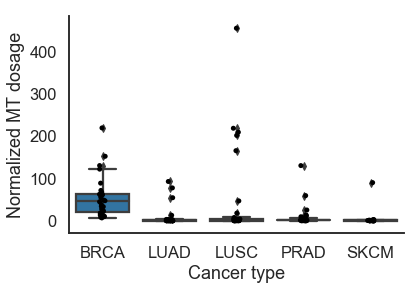

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="cov_MT_norm", data=data_cov_WXS)
g=sns.stripplot(x="disease", y="cov_MT_norm", data=data_cov_WXS, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='Normalized MT dosage')
g=sns.despine()
#plt.show(g)
plt.savefig("MT.cov.pdf", bbox_inches='tight')

In [14]:
df_MT_div = pd.read_csv('MT.diversity.WXS.csv')
df_MT_div.head()
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_div_WXS=pd.merge(df_MT_div, metadata, on='ID')
data_div_WXS.head()

,ID,average.MT.div,max.MT.div,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,0.285526,0.971534,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,04dad306f9be80db39f4be578091aa11,0.014886,0.226411,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN
2,08886fe521e2ff176295468dc519d9f3,0.325265,1.000000,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN
3,09f52a751a3bd08f2fd4dcc61a046ed0,0.008254,0.057301,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,NaN,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN
4,0e66d92c70e71ca68bc7df03f140ac23,0.110097,0.793128,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN


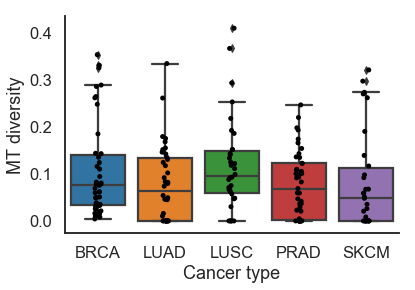

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="average.MT.div", data=data_div_WXS)
g=sns.stripplot(x="disease", y="average.MT.div", data=data_div_WXS, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='MT diversity')
g=sns.despine()
#plt.show(g)
plt.savefig("MT.cov.pdf", bbox_inches='tight')    

In [23]:
import os
import csv
import sys

path = './MT.RNA.Seq/cov/'

fileOut=open('MT.RNASeq.csv',"w")
fileOut.write('ID,cov.MT.RNASeq\n')



for f in os.listdir(path):
    file=open("./MT.RNA.Seq/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov=0
    
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        cov+=n
        
            
        
    fileOut.write(f.replace('.sort.MT.cov','')+","+str(cov/16569.0))
    fileOut.write("\n")

In [24]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
df_MT = pd.read_csv('MT.RNASeq.csv')
data_MT=pd.merge(df_MT, metadata, on='ID')

depth_RNASeq=pd.read_csv('../bams/NR.RNASeq.csv')
data_RNASeq_cov=pd.merge(data_MT, depth_RNASeq, on='ID')

data_RNASeq_cov['cov.MT.RNASeq.norm'] = (data_RNASeq_cov['cov.MT.RNASeq']/data_RNASeq_cov['NR'])*1000000


data_MT.head()

,ID,cov.MT.RNASeq,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,022dd75d-0977-40b5-8804-bf0a281c149b_gdc_realn...,446.944294,9,TCGA-21-1082,TCGA-21-1082-01A-01R-0692-07,RNASeq,NaN,NaN,NaN,NaN,...,61.0,TCGA,LUSC,1,8.0,7.0,8.0,6.0,0e2ee54a-51c9-4868-842d-a2a1c1cfb016,NaN
1,06ab660e-2766-4c97-8f2e-b8495ddc0880_gdc_realn...,358.926912,230,TCGA-BF-A5EP,TCGA-BF-A5EP-01A-12R-A27Q-07,RNASeq,NaN,NaN,NaN,70.0,...,75.0,TCGA,SKCM,1,8.0,6.0,8.0,6.0,888ef0fc-fc84-4afb-a369-695fee5ae4f6,NaN
2,0ade1371-b218-4f01-a39e-b503d30d24e0_gdc_realn...,209.912910,373,TCGA-HC-7210,TCGA-HC-7210-01A-11R-2118-07,RNASeq,NaN,NaN,NaN,NaN,...,74.0,TCGA,PRAD,1,7.0,6.0,7.0,5.0,6a5af80e-07ad-4cd3-aaab-5db1090835d9,NaN
3,0afa74a0-7a7c-4b48-a253-45070049ceea_gdc_realn...,150.618806,281,TCGA-E2-A9RU,TCGA-E2-A9RU-01A-11R-A41B-07,RNASeq,NaN,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,6f18f96e-c0c9-4cc4-9fb2-cba8949d5402,NaN
4,0e0dd65a-4a41-4f6c-9ff9-d3cea84de4d7_gdc_realn...,136.492546,381,TCGA-HC-7817,TCGA-HC-7817-01B-11R-A29R-07,RNASeq,NaN,NaN,NaN,NaN,...,52.0,TCGA,PRAD,1,9.0,7.0,8.0,7.0,f3aa40b9-7b4d-465a-b7c9-591aebdb56c2,NaN


In [ ]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.MT.RNASeq.norm", data=data_RNASeq_cov,order=["BRCA", "LUAD", "LUSC","PRAD","SKCM"]).set_title("MT cov RNA-Seq")
sns.stripplot(x="disease", y="cov.MT.RNASeq.norm", data=data_RNASeq_cov, palette=["black"], jitter=0.05,order=["BRCA", "LUAD", "LUSC","PRAD","SKCM"])



In [ ]:
##ID,average.MT.div,max.MT.div

import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="average.MT.div.RNA.seq", data=data_div_RNASeq,order=["BRCA", "LUAD", "LUSC","PRAD","SKCM"])
ax=sns.stripplot(x="disease", y="average.MT.div.RNA.seq", data=data_div_RNASeq, palette=["black"], jitter=0.05,order=["BRCA", "LUAD", "LUSC","PRAD","SKCM"])
ax.set_title('Mt diversity RNASeq')

In [ ]:
df_MT_div_WXS = pd.read_csv('MT.diversity.WXS.csv')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_div_WXS=pd.merge(df_MT_div_WXS, metadata, on='ID')
data_div_WXS2 = data_div_WXS[['ID', 'average.MT.div','patientBarcode','disease']].copy()
data_div_WXS2.head()


In [ ]:
import scipy.stats  as stats
sns.regplot(x="average.MT.div", y="average.MT.div.RNA.seq",data=data_div_both)
stats.pearsonr(data_div_both['average.MT.div'], data_div_both['average.MT.div.RNA.seq'])
